How to run a stellar evolution code
====================

Here we will generate initial conditions for a stellar evolution code. We will adopt population synthesis as well as Henyey stellar evolution.

For reference you can read chapter 3 of Portegies Zwart & McMillan 2018 (2018araa.book.....P). 

With this tutorial you will learn
- how to generate inital conditions (mass-function, King-model)
- to initialize an gravitational N-body code
- channels and intra-code data transfer
- detecting binaries
- plotting results
- making cumulative distributions

In [1]:
%matplotlib inline
import numpy
from matplotlib import pyplot
from amuse.units import units

We start by setting-up a simulation by spe

In [2]:
from amuse.datamodel import Particles
n_stars = 1024
mmin = 0.1 | units.MSun
mmax = 100 | units.MSun

from amuse.lab import new_kroupa_mass_distribution
mkroupa = new_kroupa_mass_distribution(n_stars,
                                           mass_min=mmin, 
                                           mass_max=mmax)
k_stars = Particles(mass=mkroupa)
from amuse.lab import new_salpeter_mass_distribution
msalpeter = new_salpeter_mass_distribution(n_stars, 
                                           mass_min=mmin, 
                                           mass_max=mmax)
s_stars = Particles(mass=msalpeter)
print("mean-mass for Kroupa=", numpy.mean(k_stars.mass))
print("mean-mass for Salpeter=", numpy.mean(s_stars.mass))

mean-mass for Kroupa= 0.743058939625 MSun
mean-mass for Salpeter= 0.300135352432 MSun


Now the mass functions are determine, we can evolve the stars in time. for this we start two stellar evolution codes, both parametrized and evolve the stars in time.

In [3]:
from amuse.community.seba.interface import SeBa
def start_stellar_code(stars):
    stellar = SeBa()
    stellar.particles.add_particles(stars)
    channels = {"to_stars": stellar.particles.new_channel_to(stars), 
                "to_stellar": stars.new_channel_to(stellar.particles)}
    return stellar, channels
kstellar, kchannels = start_stellar_code(k_stars)
sstellar, schannels = start_stellar_code(s_stars)

Stellar evolion code is declared. Not run in time and calculate the mean mass as a function of time

In [4]:
times = 10**numpy.arange(0.0, 4.0, 0.1) | units.Myr
mmean = []
for time in times:
    kstellar.evolve_model(time)
    kchannels["to_stars"].copy()
    sstellar.evolve_model(time)
    schannels["to_stars"].copy()
    mmean.append(numpy.mean(k_stars.mass)/numpy.mean(s_stars.mass))
kstellar.stop()
sstellar.stop()
print("mean-mass for Kroupa=", numpy.mean(k_stars.mass))
print("mean-mass for Salpeter=", numpy.mean(s_stars.mass))

mean-mass for Kroupa= 0.434564655608 MSun
mean-mass for Salpeter= 0.254261266059 MSun


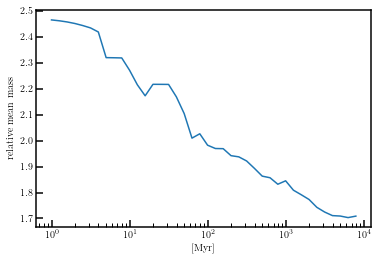

In [5]:
from amuse.plot import plot
plot(times, mmean)
pyplot.ylabel("relative mean mass")
pyplot.semilogx()
pyplot.show()

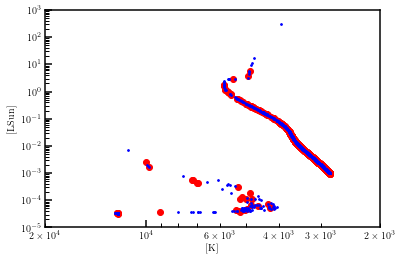

In [6]:
from amuse.plot import scatter
scatter(s_stars.temperature, s_stars.luminosity, c='r')
scatter(k_stars.temperature, k_stars.luminosity, c='b', s=3)
pyplot.xlim(2.e+4, 2000)
pyplot.ylim(1.e-5, 1000)
pyplot.loglog()
pyplot.show()

You have calculated the evolution of a stellar population with solar metalicity.

Assignmnets and questions:
---------------

### Assignment 1:
Run the notebook and describe the evolution of the relative mean stellar mass. Why does it drop with time?

### Assignment 2:
Compare the mean mass of two stellar populations with different metalicity, 0.02 (solar) and 0.1 (5-times solar).

### Question 1:
Is there a difference in the number of compact objects in the two populations, and is this difference statistically significant?

Is this same difference also noticeable in the number of main-sequence stars?

### Assignment 3:
Calculate, instead of the mean mass, the total luminosity and temperature of the entire population of stars as a function of time.
Make a plot of these parameters for both mass function. 

### Question 4:
Can one, based on observational differences in luminosity and integrated temperature, make a distinction between the two mass functions?